In [1]:
import numpy as np
import os, sys
from skimage import io
import matplotlib
from pprint import pprint
from matplotlib import pyplot as plt
from tqdm import tqdm
import cv2
import neuroglancer
from PIL import Image
from scipy.ndimage import zoom

In [8]:
ROOT = '/net/birdstore/Active_Atlas_Data/data_root'
reg_path = 'brains_info/registration'
allen25um_path = os.path.join(ROOT, reg_path, 'Allen_25um_sagittal.tif') 
allen25um = io.imread(allen25um_path)
print('z,y,x', allen25um.shape, allen25um.dtype)

z,y,x (456, 450, 675) uint16


In [48]:
filepath = os.path.join(ROOT, 'pipeline_data/DK37/preps/C1/thumbnail_aligned')
files = sorted(os.listdir(filepath))
lfiles = len(files)
midpoint = (lfiles // 2)  - 0
midfile = files[midpoint]
print(midpoint, lfiles, midfile)
midfilepath = os.path.join(filepath, midfile)
DK37_mid_arr = io.imread(midfilepath)
print(DK37_mid_arr.shape)

239 479 239.tif
(984, 1765)


In [52]:
# only works when lfiles is odd
print('midpoint', midpoint)
print('#files', lfiles)
below = range(0,midpoint)
above = range(midpoint + 1, lfiles)

midpoint 239
#files 479


In [4]:
midz = allen25um.shape[0] // 2
mid_arr = allen25um[midz, ...]
print(mid_arr.shape, mid_arr.dtype, midz) 

(450, 675) uint16 228


Text(0.5, 1.0, 'DK37 239')

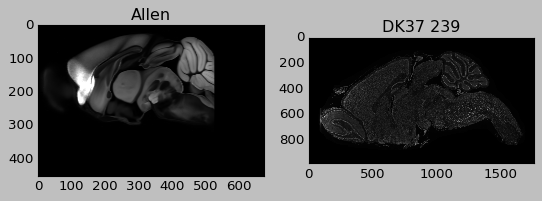

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.imshow(mid_arr, cmap="gray")
ax1.set_title('Allen')
ax2.imshow(DK37_mid_arr, cmap="gray")
ax2.set_title(f'DK37 {midpoint}')

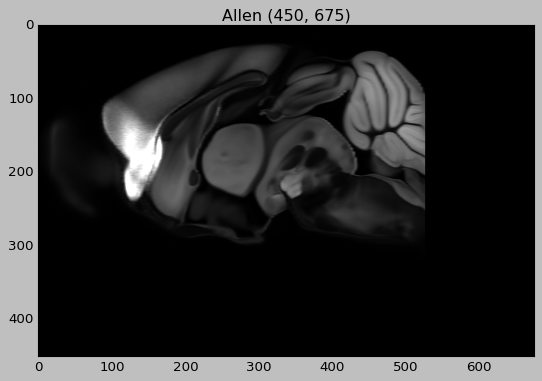

In [53]:
plt.style.use('classic')
plt.title(f'Allen {mid_arr.shape}')
plt.imshow(mid_arr, cmap="gray")
plt.show()

In [7]:
DK_resolution = 10.4
allen_resolution = 25
change = allen_resolution / DK_resolution
changes = (change, change)
DKscaled_allen = zoom(mid_arr, changes)
print(DKscaled_allen.shape, DKscaled_allen.dtype)

(1082, 1623) uint16


In [ ]:
print(volume.shape, volume.dtype, np.amin(volume), np.amax(volume), np.mean(volume))

In [ ]:
#arr = np.rot90(arr, 3)
midsection = volume.shape[2] // 2 
n = 4
start = midsection - n
end = midsection + n
plt.style.use('classic')
for i in range(start, end,1):
    img = volume[:,:,i]
    img[img > 0] = 255
    print(img.dtype, img.shape)
    #img = np.rot90(img, 3)
    #img = np.flip(img, axis=1)
    plt.title('Z {}'.format(i))
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
boundary_outpath = os.path.join(ROOT, animal, 'preps/CH1/boundary')
os.makedirs(boundary_outpath, exist_ok=True)
arr = volume.copy()
endsection = arr.shape[2]   
for i in tqdm(range(0, endsection, 1)):
    img = arr[:,:,i]
    img[img > 0] = 255
    f = str(i).zfill(3) + '.tif'
    outpath = os.path.join(boundary_outpath, f)
    cv2.imwrite(outpath, img)
    


In [ ]:
sagittal_arr = sagittal_arr.astype(np.uint8)
print(sagittal_arr.shape, sagittal_arr.dtype)
midsection = sagittal_arr.shape[2] // 2 
n = 2
start = midsection - n
end = midsection + n
plt.style.use('classic')
for i in range(start, end,1):
    img = sagittal_arr[:,:,i]
    plt.title('Z {}'.format(i))
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
sagittal_np_path = os.path.join(ROOT, animal, 'preps/CH1/brainreg_allen', 'sagittal_boundary')
np.save(sagittal_np_path, sagittal_arr)

In [ ]:
change_y = mid_arr.shape[0] / sagittal_arr.shape[0]
change_x = mid_arr.shape[1] / sagittal_arr.shape[1]
change_z = z / sagittal_arr.shape[2]
print(change_y, change_x, change_z)

In [ ]:
zatlas = zoom(sagittal_arr, (change_y, change_x, change_z))
print('zatlas',zatlas.shape)
print('volume', mid_arr.shape, z)

In [ ]:
dimensions = neuroglancer.CoordinateSpace(
    names=['x', 'y', 'z'],
    units='um',
    scales=[10.4, 10.4, 20])

viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.dimensions = dimensions
    s.layers['Altas'] = neuroglancer.ImageLayer(
        source=neuroglancer.LocalVolume(
            data=volume,
            dimensions=dimensions,
            voxel_offset=(0, 0, 0),
        ),
        shader="""
#uicontrol invlerp normalized

void main() {
    float pix =  normalized();
  	  emitGrayscale(pix) ;
}
""")
print(viewer)

In [ ]:
OUTPATH = os.path.join(HOME, 'work','tifs')
arr = volume.copy()
arr = np.rot90(arr, 3)
start = 0
end = arr.shape[2]
for i in range(start, end,1):
    outfile = str(i).zfill(3) + '.tif'
    outpath = os.path.join(OUTPATH, outfile)
    cv2.imwrite(outpath, arr[:,:,i])